In [348]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants as cn
import cmath
import scienceplots

plt.style.use(['science','nature'])
#plt.style.use('science')
#plt.rcParams.update({'figure.dpi': '300'})

In [349]:
# define the ellipticity
def ellipticity(theta,w_c,w_p,w_i):
    u = (w_c/w_i)**2
    v = (w_p/w_i)**2
    b = (u**(1/2)*np.sin(theta)**2)/(2*np.cos(theta)*(1-v))
    alpha = -b**(-1)*(1 + (1 + b**(-2))**(1/2))**(-1)
    return alpha, b

In [350]:
# constants and variables in CGS units

m_e = cn.m_e*1000 # mass of electron in grams
c = cn.c * 100 # in cm/s
e = cn.e*(1/3.336)*10**10 # in ESU
pi = cn.pi
evtoerg = 1.6021772e-12	 # ev to erg
a_f = 7.29735308e-3	# fine structure constant
h = 6.6261e-27 # planck's constant
hbar = 1.0546e-27 # reduced planck's constant
sigma_t = 6.6525*10**(-25) # thomson cross-section, cm^2
m_p = 1.67*10**(-24) # mass of proton in grams
# define the variables
n_e = 5*10**21 # number density, cm^-3
B = 4.141*10**12 # the magnetic field, in Gauss
B_c = 4.141*10**13 # the critical magnetic field, in Gauss

w_p = np.sqrt((4*pi*e**2*n_e)/m_e) # the plasma frequency
w_c = (w_p**2/10**(-11))**(1/2)  # cyclotron frequency
w_i = 10*w_c # the frequency we have chosen

In [351]:
print(w_p, w_c, w_i)

3988685442521874.0 1.2613330868325749e+21 1.2613330868325749e+22


In [352]:
w_i

1.2613330868325749e+22

In [353]:
u = (w_c/w_i)**2
v = (w_p/w_i)**2

In [354]:
gamma_r = (2/3)*(e**2*w_i)/(m_e*c**3)

In [355]:
def pol_vec1(angles):
    alpha, b = ellipticity(angles*np.pi/180,w_c,w_p,w_i)
    K1 = b*(1 - (1 + b**(-2))**(1/2))
    C1 = (1 + K1**2)**(-1/2)
    e_z1 = C1*K1*np.sin(angles*np.pi/180)
    e_p1 = 2**(-1/2)*C1*np.exp(-1j*np.pi/4)*(K1*np.cos(angles*np.pi/180) + 1)
    e_m1 = 2**(-1/2)*C1*np.exp(1j*np.pi/4)*(K1*np.cos(angles*np.pi/180) - 1)

    return e_p1, e_m1, e_z1

In [356]:
def pol_vec2(angles):
    alpha, b = ellipticity(angles*np.pi/180, w_c, w_p,w_i)
    K2 = b*(1 + (1 + b**(-2))**(1/2))
    C2 = (1 + K2**2)**(-1/2)
    e_z2 = C2*K2*np.sin(angles*np.pi/180)
    e_p2 = 2**(-1/2)*C2*np.exp(-1j*np.pi/4)*(K2*np.cos(angles*np.pi/180) + 1)
    e_m2 = 2**(-1/2)*C2*np.exp(1j*np.pi/4)*(K2*np.cos(angles*np.pi/180) - 1)

    return e_p2, e_m2, e_z2

In [357]:
#theta = np.arccos(0.5773502691896257)*180/pi
theta = 90
print(theta)

90


In [358]:
# incident angle theta = 30 and outgoing angle theta = 30
ei1p30, ei1m30, ei1z30 = pol_vec1(theta)
ei2p30, ei2m30, ei2z30 = pol_vec2(theta)

In [359]:
# differential cross-section polarization mode 1 to 1 (30)
dsigma1133 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ei1p30)*ei1p30 + (1/(1 - u**(1/2)))*np.conj(ei1m30)*ei1m30 + np.conj(ei1z30)*ei1z30)
dsigma1233 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ei2p30)*ei1p30 + (1/(1 - u**(1/2)))*np.conj(ei2m30)*ei1m30 + np.conj(ei2z30)*ei1z30)
# differential cross-section polarization mode 2 to 1
dsigma2133 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ei1p30)*ei2p30 + (1/(1 - u**(1/2)))*np.conj(ei1m30)*ei2m30 + np.conj(ei1z30)*ei2z30)
dsigma2233 = a_f**2*(hbar/m_e*c)**2*np.abs((1/(1 + u**(1/2)))*np.conj(ei2p30)*ei2p30 + (1/(1 - u**(1/2)))*np.conj(ei2m30)*ei2m30 + np.conj(ei2z30)*ei2z30)

In [360]:
print(dsigma2133)
print(dsigma1233)
print(dsigma2233)
print(dsigma1133)

39.27810480024978
39.27810480024978
6.414601308328359e+16
6.4793952609377384e+16


In [361]:
# scattering cross-section per thomson cross_section

scross_130 = ((1/(1+u**(1/2))**2)*np.abs(ei1p30)**2 + (1/((1-u**(1/2))**2 + gamma_r**2))*np.abs(ei1m30)**2 + np.abs(ei1z30)**2)
scross_230 = (1/(1+u**(1/2))**2)*np.abs(ei2p30)**2 + (1/((1-u**(1/2))**2 + gamma_r**2))*np.abs(ei2m30)**2 + np.abs(ei2z30)**2

In [362]:
print(scross_130, scross_230)

1.0257845378766195 1.0


In [363]:
# total scattering crosssection
sigma1 = scross_130*sigma_t
sigma2 = scross_230*sigma_t

In [364]:
# the scattering opacity
k_s1 = sigma1/(0.5*m_p)
k_s2 = sigma2/(0.5*m_p)

In [365]:
# absorption coefficient
k_a1 = (sigma1/gamma_r)/(0.5*m_p)
k_a2 = (sigma2/gamma_r)/(0.5*m_p)

In [366]:
# for polarization mode 1

kappa1 = k_a1 + k_s1
source1 = 4*pi*(dsigma1133 + dsigma1233)
deltaz = 0.1
mu = np.cos(theta*np.pi/180)

muz2 = mu**2/deltaz**2
kterm = kappa1**2 + 2*muz2 - (kappa1**2)*source1

In [367]:
# for polarization mode 2

kappa2 = k_a2 + k_s2
source2 = 4*pi*(dsigma2133 + dsigma2233)
deltaz = 0.1
mu = np.cos(theta*np.pi/180)

muz2 = mu**2/deltaz**2
kterm2 = kappa2**2 + 2*muz2 - (kappa2**2)*source2

In [368]:
# arrays for depth

d0 = np.array([(1 + ((deltaz*kappa1)/mu)), -1, 0, 0, 0, 0])
d1 = np.array([-muz2, kterm, -muz2, 0, 0, 0])
d2 = np.array([0, -muz2, kterm, -muz2, 0, 0])
d3 = np.array([0, 0, -muz2, kterm, -muz2, 0])
d4 = np.array([0, 0, 0, -muz2, kterm, -muz2])
d5 = np.array([0, 0, 0, 0, -mu/(kappa1*deltaz), 1 + (mu/(kappa1*deltaz))])

d02 = np.array([(1 + ((deltaz*kappa2)/mu)), -1, 0, 0, 0, 0])
d12 = np.array([-muz2, kterm2, -muz2, 0, 0, 0])
d22 = np.array([0, -muz2, kterm2, -muz2, 0, 0])
d32 = np.array([0, 0, -muz2, kterm2, -muz2, 0])
d42 = np.array([0, 0, 0, -muz2, kterm2, -muz2])
d52 = np.array([0, 0, 0, 0, -mu/(kappa2*deltaz), 1 + (mu/(kappa2*deltaz))])

In [369]:
uvals_coeff2 = np.array([d02, d12, d22, d32, d42, d52])
uvals_coeff1 = np.array([d0, d1, d2, d3, d4, d5])

In [370]:
fhz = w_i/(2*pi)
E = 6.6261e-34*fhz*6.242*10**18

#Bnu = 2*h*(w_i)**3/(c**2)*(1 - E/86.87)

# kappaib1 = Bnu*k_a1
# kappaib2 = Bnu*k_a2

kappaib1 = 0.1
kappaib2 = 0.1

In [371]:
b1 = np.array([kappaib1, kappaib1, kappaib1, kappaib1, kappaib1, kappaib1])
b2 = np.array([kappaib2, kappaib2, kappaib2, kappaib2, kappaib2, kappaib2])

In [372]:
# u1 = np.abs(np.linalg.solve(uvals_coeff1,b1))
# u2 = np.abs(np.linalg.solve(uvals_coeff2,b2))
u1 = np.linalg.solve(uvals_coeff1,b1)
u2 = np.linalg.solve(uvals_coeff2,b2)

In [373]:
print(u1, u2)

[ 5.48720941e-18 -9.86272716e-22 -9.86272716e-22 -9.86272716e-22
 -9.86272716e-22  1.00000000e-01] [ 5.62869457e-18 -1.04827233e-21 -1.04827233e-21 -1.04827233e-21
 -1.04827233e-21  1.00000000e-01]


In [374]:
z = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5])

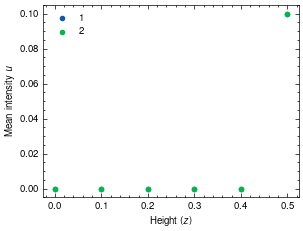

In [375]:
plt.scatter(z[0:6], u1[0:6], label='1')
plt.scatter(z[0:6], u2[0:6], label='2')
plt.xlabel(r'Height ($z$)')
plt.ylabel(r'Mean intensity $u$')
plt.legend()
plt.savefig('mean_int_90.eps',format='eps', dpi=1000)

In [376]:
kappa1*z

array([0.        , 1.11591039, 2.23182078, 3.34773117, 4.46364156,
       5.57955195])

In [377]:
(u2 - u1)/(u2 + u1)

array([0.01272817, 0.03047345, 0.03047345, 0.03047345, 0.03047345,
       0.        ])

1. when close to zero, both can emerge and resonate
2. ordinary mode gets attenuated at high optical depths in theta = 90